In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import slotted_disk
from fvhoe.solver import EulerSolver

In [2]:
solver = EulerSolver(
    w0=slotted_disk,
    nx=64,
    ny=64,
    px=3,
    py=3,
    riemann_solver="advection_upwind",
    cupy=True,
)

In [3]:
solver.rkorder(0.05)

100%|██████████| 0.05/0.05 [00:01]                


t=0.05, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0, 0.5, '$y$')

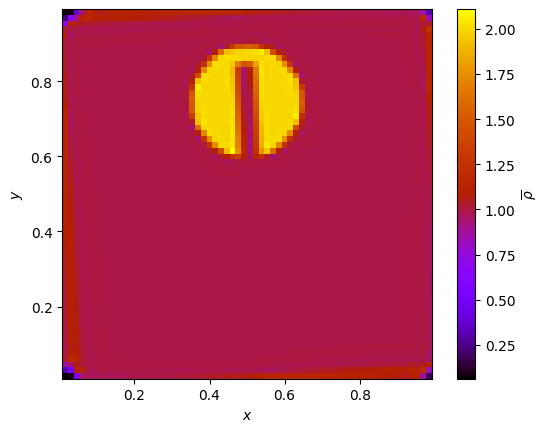

In [4]:
fig, ax = plt.subplots()

param = "rho"
im = solver.plot_2d_slice(ax, t=0.05, param=param, cmap="gnuplot", z=0.5)
fig.colorbar(im, ax=ax, label=r"$\overline{\rho}$")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [5]:
for t in [0, 1]:
    m_tot = np.sum(solver.snapshots[0]["rho"][:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {t}: {m_tot}")

Total mass at time 0: 0.015625
Total mass at time 1: 0.015625
